# PROYEK ANALISIS DATA

Dataset yang digunakan adalah : Bike Sharing Dataset (Sumber)

Dataset : day dan hour.csv

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Mengimport library numpy dan mengaliasnya sebagai np
import numpy as np

# Mengimport library pandas dan mengaliasnya sebagai pd
import pandas as pd

# Mengimport library matplotlib.pyplot dan mengaliasnya sebagai plt
import matplotlib.pyplot as plt
import seaborn as sns

# Mengabaikan warning yang muncul saat menjalankan kode
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

**Load Data "day"**

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/reguelpangrib29/ReguelPangaribuan-FinalProjectStructure/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Load Data "hour"**

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/reguelpangrib29/ReguelPangaribuan-FinalProjectStructure/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

**Menilai data tabel day.df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Hal ini menunjukkan apakah adanya missing values pada kolom tabel day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai data tabel hour.df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Hal ini menunjukkan apakah adanya missing values pada kolom tabel hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### **Membersihkan tabel day_df**

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

*    **Menghilangkan Duplicate Data**

Masalah pertama yang akan kita tangani ialah duplicate data. Seperti yang telah kita pelajari sebelumnya, ketika menemukan duplikasi pada data, kita harus menghilangkan atau menghapus duplikasi tersebut. Nah, untuk melakukan hal ini, kita dapat memanfaatkan method drop_duplicates().

In [12]:
day_df.duplicated().sum()

0

In [13]:
day_df.drop_duplicates(inplace=True)

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


*    **Menangani Missing Values**

Secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [15]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
day_df[day_df.season.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [17]:
# Mengetahui value_counts()
day_df.value_counts()

,,,,,,,,,,,,,,,,count
instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
481,2012-04-25,2,1,4,0,3,1,1,0.476667,0.470317,0.427917,0.118792,655,5541,6196,1
483,2012-04-27,2,1,4,0,5,1,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233,1
484,2012-04-28,2,1,4,0,6,0,2,0.376667,0.377504,0.489583,0.129975,1120,3100,4220,1
485,2012-04-29,2,1,4,0,0,0,1,0.458333,0.450121,0.587083,0.116908,2229,4075,6304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484,1
247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940,1
248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351,1


In [18]:
# Mengetahui value_counts() pada season
day_df.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [19]:
# Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “3”.
# Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value.
day_df.fillna(value="3", inplace=True)

In [20]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


*    **Menangani Inaccurate Values**

Perlu melihat data baris data yang mengandung inaccurate value tersebut

In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
day_df[day_df.atemp == day_df.atemp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.1331,562,2825,3387


In [23]:
# Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol.
# Oleh karena itu, gantilah dengan nilai 5. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut.

In [24]:
day_df.season.replace(day_df.season.max(), 5, inplace=True)

In [25]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.740082,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.466809,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,5.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Membersihkan tabel hour_df**

*   **Menghilangkan Duplicate Data**

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
# Memperbaiki tipe data
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [28]:
# Setelah diperbaiki
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [29]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### **Explore Data day_df**

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [30]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.740082,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.466809,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [31]:
# Mengambil beberapa sample
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
411,412,2012-02-16,1,1,2,0,4,1,2,0.316667,0.330162,0.752917,0.091425,74,2931,3005
587,588,2012-08-10,3,1,8,0,5,1,2,0.715833,0.667942,0.715833,0.238813,1065,4721,5786
102,103,2011-04-13,2,0,4,0,3,1,2,0.412500,0.417283,0.819167,0.250617,209,1953,2162
208,209,2011-07-28,3,0,7,0,4,1,1,0.779167,0.739900,0.583333,0.178479,606,3784,4390
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096


In [32]:
day_df.holiday.is_unique

False

In [33]:
day_df.holiday.duplicated

<bound method Series.duplicated of 0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: holiday, Length: 731, dtype: int64>

Sekarang coba kita lihat demografi bike-sharing pada season (musim). Untuk melakukan ini, kita akan menggunakan method groupby() yang diikuti dengan method agg(). Berikut contoh kode untuk melakukannya.

In [34]:
day_df.groupby(by="season").agg({
    "holiday": "nunique",
    "workingday": ["max", "min", "mean", "std"]
})

holiday workingday                        
       nunique        max min      mean       std
season                                           
1            2          1   0  0.662983  0.474002
2            2          1   0  0.695652  0.461386
3            2          1   0  0.696809  0.460865
5            2          1   0  0.679775  0.467879

In [35]:
# Untuk melakukannya kita juga akan menggunakan method groupby().
# Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending.
day_df.groupby(by="yr").holiday.nunique().sort_values(ascending=False)
day_df.groupby(by="weathersit").holiday.nunique().sort_values(ascending=False)

,holiday
weathersit,
1,2
2,2
3,1


### **Explore Data hour_df**

In [39]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3894,3895,2011-06-16,2,0,6,4,0,4,1,2,0.56,0.5303,0.68,0.1045,0,6,6
13689,13690,2012-07-29,3,1,7,14,0,0,0,1,0.80,0.7273,0.46,0.1940,231,291,522
14343,14344,2012-08-25,3,1,8,20,0,6,0,3,0.62,0.5758,0.83,0.2537,65,176,241
10399,10400,2012-03-14,1,1,3,10,0,3,1,1,0.56,0.5303,0.56,0.1045,38,150,188
13002,13003,2012-06-30,3,1,6,23,0,6,0,1,0.78,0.7424,0.62,0.0896,33,119,152


In [43]:
# Mengonversikan kolom dteday menjadi tipe data datetime
# Menggunakan pd.to_timedelta untuk mengonversi kolom holiday menjadi timedelta.
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [44]:
# Konversikan kolom 'holiday' menjadi timedelta (dalam hari)
temp_day = hour_df["dteday"] - pd.to_timedelta(hour_df["holiday"], unit='D')

In [47]:
# Hitung selisih hari secara langsung
hour_df["temp_day"] = (temp_day - hour_df["dteday"]).dt.days

In [48]:
# Mengecek kembali pada DataFrame sample (5)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_day
15014,15015,2012-09-22,3,1,9,19,0,6,0,1,0.70,0.6515,0.58,0.1940,99,308,407,0
17347,17348,2012-12-30,1,1,12,16,0,0,0,1,0.28,0.2424,0.38,0.4179,31,102,133,0
10808,10809,2012-03-31,2,1,3,11,0,6,0,1,0.46,0.4545,0.72,0.1343,184,279,463,0
5826,5827,2011-09-05,3,0,9,5,1,1,0,2,0.66,0.6212,0.74,0.1642,2,4,6,-1
9174,9175,2012-01-23,1,1,1,4,0,1,1,2,0.20,0.2576,0.80,0.0000,0,1,1,0


In [49]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,-0.028770
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.167165


<Axes: >

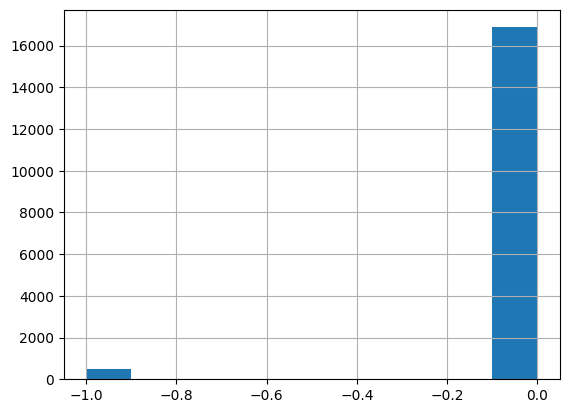

In [51]:
# Visualisasi dalam histogram temp_day
hour_df.temp_day.hist()

### **Eksplorasi sekaligus kedua data day_df dan hour_df**

In [53]:
holiday_in_hour_df =  hour_df.holiday.tolist()
day_df["status"] = day_df["holiday"].apply(lambda x: "Active" if x in holiday_in_hour_df else "Non Active")
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
101,102,2011-04-12,2,0,4,0,2,1,2,0.502500,0.493054,0.739167,0.274879,257,1777,2034,Active
298,299,2011-10-26,5,0,10,0,3,1,2,0.484167,0.472846,0.720417,0.148642,404,3490,3894,Active
181,182,2011-07-01,3,0,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,1246,4116,5362,Active
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040,Active
349,350,2011-12-16,5,0,12,0,5,1,2,0.375000,0.359825,0.500417,0.260575,178,3399,3577,Active


In [58]:
# Memeriksa total status active pada day_df
day_df.groupby(by="status").holiday.count()

,holiday
status,
Active,731


In [59]:
# Memeriksa total status non-active pada day_df
day_df[day_df.status == "Non Active"]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status


Tidak ada status non-active pada day_df

#### **Menggabungkan data day_df dan hour_df**

In [61]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="holiday",
    right_on="holiday"
)
day_hour_df.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,temp_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,0


In [68]:
# Jumlah day berdasarkan registered_y
day_hour_df.groupby(by="registered_y").instant_x.nunique().sort_values(ascending=False).reset_index().head(10)

,registered_y,instant_x
0,0,731
1,337,731
2,161,731
3,162,731
4,163,731
5,164,731
6,165,731
7,461,731
8,168,731
9,317,731


In [69]:
# Jumlah day berdasarkan cnt_y
day_hour_df.groupby(by="cnt_y").instant_x.nunique().sort_values(ascending=False).head(10)

,instant_x
cnt_y,
1,731
243,731
239,731
238,731
237,731
236,731
494,731
232,731
497,731


In [70]:
# Jumlah day berdasarkan casual_y
day_hour_df.groupby(by="casual_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
casual_y,
0,731
112,731
115,731
116,731
117,731
...,...
188,710
192,710
193,710


In [72]:
# Jumlah day berdasarkan hum_y
day_hour_df["hum_y_group"] = day_hour_df.hum_y.apply(lambda x: "Youth" if x <= 24 else ("Work" if x > 64 else "Weather"))
day_hour_df.groupby(by="hum_y_group").instant_x.nunique().sort_values(ascending=False)

,instant_x
hum_y_group,
Youth,731


## Visualization & Explanatory Analysis

In [74]:
day_hour_df.sample(5)

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,temp_day,hum_y_group
2966226,180,2011-06-29,3,0,6,0,3,1,1,0.728333,...,1,0.24,0.2273,0.38,0.1940,8,259,267,0,Youth
638567,39,2011-02-08,1,0,2,0,2,1,1,0.220833,...,2,0.80,0.7424,0.52,0.1343,63,151,214,0,Youth
4754603,289,2011-10-16,5,0,10,0,0,0,1,0.511667,...,1,0.20,0.2576,0.69,0.0000,1,31,32,0,Youth
306885,20,2011-01-20,1,0,1,0,4,1,2,0.261667,...,1,0.66,0.6212,0.65,0.2985,142,189,331,0,Youth
10073764,614,2012-09-05,3,1,9,0,3,1,1,0.736667,...,2,0.70,0.6515,0.65,0.1045,2,6,8,0,Youth


In [75]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0


In [78]:
# Pilih hanya kolom yang berakhiran '_x' atau kolom lainnya yang diinginkan
day_hour_df_cleaned = day_hour_df[[col for col in day_hour_df.columns if '_x' in col] + ['hum_y_group']]

In [79]:
# Hapus suffix '_x' dari nama kolom
day_hour_df_cleaned.columns = day_hour_df_cleaned.columns.str.replace('_x', '')

In [82]:
# Pilih kolom yang relevan untuk analisis
day_hour_df_cleaned = day_hour_df[['dteday_x', 'instant_x', 'cnt_y']]

In [83]:
# Pastikan kolom 'dteday_x' bertipe datetime
day_hour_df_cleaned['dteday_x'] = pd.to_datetime(day_hour_df_cleaned['dteday_x'])

In [92]:
# Pilih kolom yang relevan untuk analisis
day_hour_df_cleaned = day_hour_df[['dteday_x', 'instant_x', 'casual_x']]

# Pastikan kolom 'dteday_x' bertipe datetime
day_hour_df_cleaned['dteday_x'] = pd.to_datetime(day_hour_df_cleaned['dteday_x'])

# Resample data untuk agregasi bulanan berdasarkan 'dteday_x' sebagai order_date
instant_day = day_hour_df_cleaned.resample(rule='M', on='dteday_x').agg({
    'instant_x': 'nunique',
    'casual_x': 'sum'
})

# Mengubah format index tanggal menjadi nama bulan
instant_day.index = instant_day.index.strftime('%B')

# Reset index untuk mengubah index menjadi kolom
instant_day = instant_day.reset_index()

# Rename kolom agar lebih informatif
instant_day.rename(columns={
    'instant_x': 'order_count',
    'casual_x': 'revenue'
}, inplace=True)

# Tampilkan hasilnya
instant_day.head()

,dteday_x,order_count,revenue
0,January,31,49952824
1,February,28,102164813
2,March,31,216490054
3,April,30,366662816
4,May,31,498721879


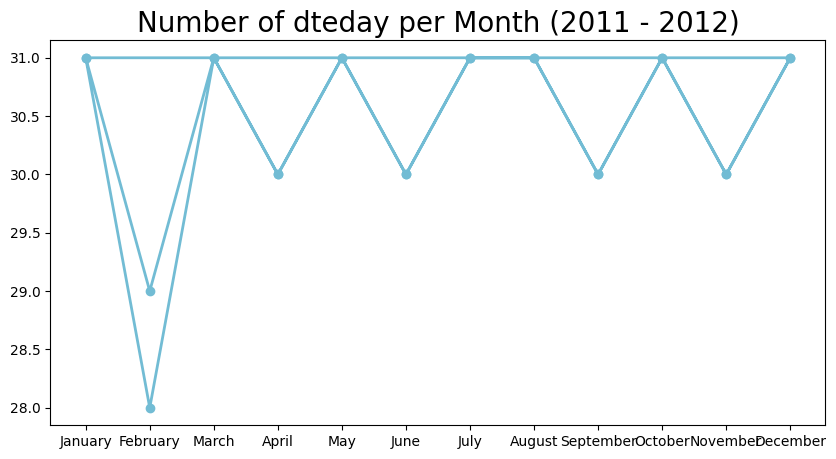

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(
    instant_day["dteday_x"],
    instant_day["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of dteday per Month (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

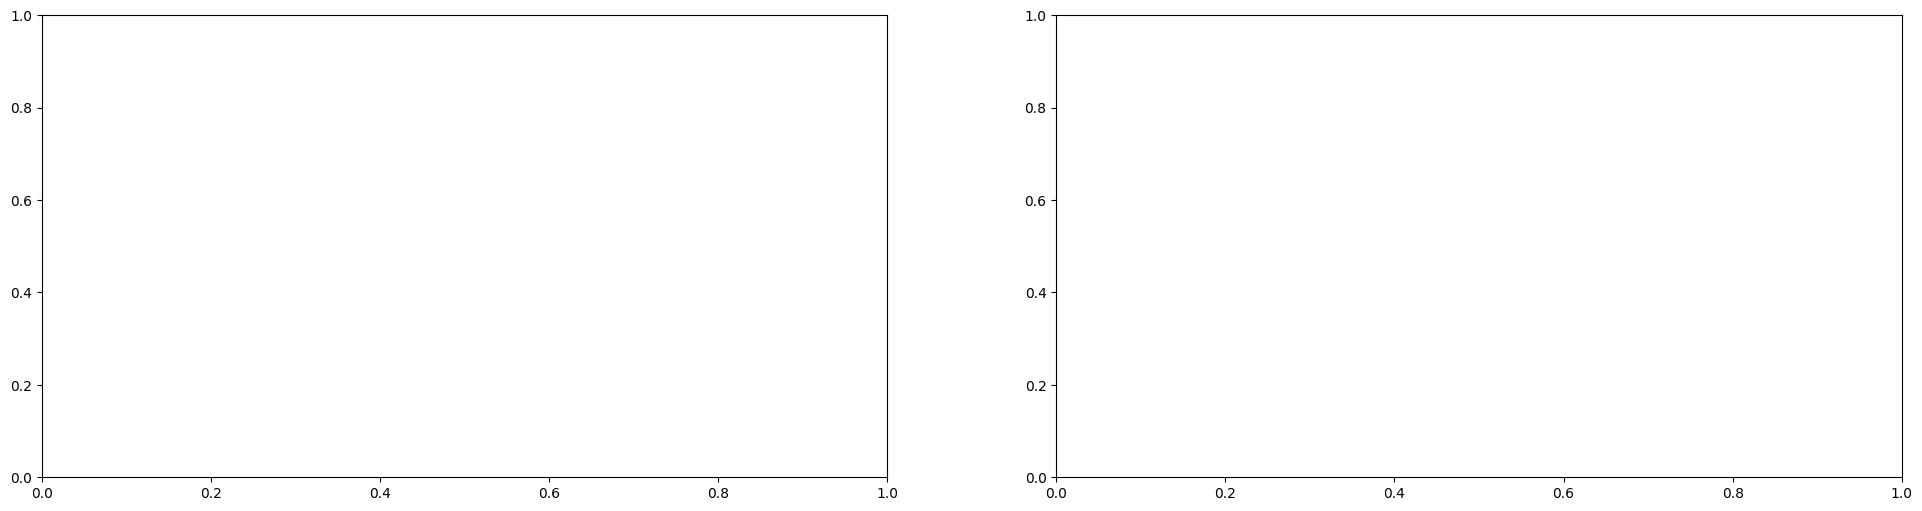

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

### RFM Analysis

In [97]:
# Convert the date column to datetime format
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Set the reference date as the latest date in the dataset for Recency calculation
reference_date = hour_df['dteday'].max()

In [102]:
# Group by year and month to calculate RFM on a monthly basis
rfm_df = hour_df.groupby(hour_df['dteday'].dt.to_period('M')).agg({
    'dteday': 'max',                  # Get the last date of each month
    'casual': 'sum',                  # Sum of casual rentals per month
    'registered': 'sum',              # Sum of registered rentals per month
    'cnt': 'sum'                      # Sum of total rentals per month
})

# Calculate Recency for each month (difference in days from the reference date)
rfm_df['Recency'] = (reference_date - rfm_df['dteday']).dt.days

In [103]:
# Calculate Recency for each month (difference in days from the reference date)
rfm_df['Recency'] = (reference_date - rfm_df['dteday']).dt.days

# Frequency and Monetary are the same as the total rentals for each user type
rfm_df['Frequency_Casual'] = rfm_df['casual']
rfm_df['Frequency_Registered'] = rfm_df['registered']
rfm_df['Monetary_Casual'] = rfm_df['casual']
rfm_df['Monetary_Registered'] = rfm_df['registered']

# Rename columns for clarity
rfm_analysis = rfm_df[['dteday', 'Recency', 'Frequency_Casual', 'Frequency_Registered', 'Monetary_Casual', 'Monetary_Registered']]
rfm_analysis.rename(columns={'dteday': 'Month'}, inplace=True)

In [105]:
rfm_df.describe()

,dteday,casual,registered,cnt,Recency,Frequency_Casual,Frequency_Registered,Monetary_Casual,Monetary_Registered
count,24,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2012-01-14 21:00:00,25834.041667,111360.916667,137194.958333,351.125000,25834.041667,111360.916667,25834.041667,111360.916667
min,2011-01-31 00:00:00,3073.000000,35116.000000,38189.000000,0.000000,3073.000000,35116.000000,3073.000000,35116.000000
25%,2011-07-23 06:00:00,13140.250000,87474.500000,100811.250000,176.250000,13140.250000,87474.500000,13140.250000,87474.500000
50%,2012-01-15 12:00:00,27693.500000,106369.000000,136256.000000,350.500000,27693.500000,106369.000000,27693.500000,106369.000000
75%,2012-07-07 18:00:00,36953.000000,139733.500000,179634.250000,526.750000,36953.000000,139733.500000,36953.000000,139733.500000
max,2012-12-31 00:00:00,44235.000000,174795.000000,218573.000000,700.000000,44235.000000,174795.000000,44235.000000,174795.000000
std,NaN,13528.543135,40136.833621,52267.138331,215.640666,13528.543135,40136.833621,13528.543135,40136.833621


In [107]:
rfm_df.sort_values(by="Recency", ascending=True).head(5)

,dteday,casual,registered,cnt,Recency,Frequency_Casual,Frequency_Registered,Monetary_Casual,Monetary_Registered
dteday,,,,,,,,,
2012-12,2012-12-31,13245,110468,123713,0,13245,110468,13245,110468
2012-11,2012-11-30,21009,131655,152664,31,21009,131655,21009,131655
2012-10,2012-10-31,34538,164303,198841,61,34538,164303,34538,164303
2012-09,2012-09-30,43778,174795,218573,92,43778,174795,43778,174795
2012-08,2012-08-31,43197,171306,214503,122,43197,171306,43197,171306


In [110]:
rfm_df.sort_values(by="Frequency_Casual", ascending=False).head(5)

,dteday,casual,registered,cnt,Recency,Frequency_Casual,Frequency_Registered,Monetary_Casual,Monetary_Registered
dteday,,,,,,,,,
2012-05,2012-05-31,44235,151630,195865,214,44235,151630,44235,151630
2012-09,2012-09-30,43778,174795,218573,92,43778,174795,43778,174795
2012-06,2012-06-30,43294,159536,202830,184,43294,159536,43294,159536
2012-08,2012-08-31,43197,171306,214503,122,43197,171306,43197,171306
2012-07,2012-07-31,41705,161902,203607,153,41705,161902,41705,161902


In [111]:
# Buat format nama bulan yang lebih jelas
rfm_df['Month'] = rfm_df['dteday'].dt.strftime('%b %Y')

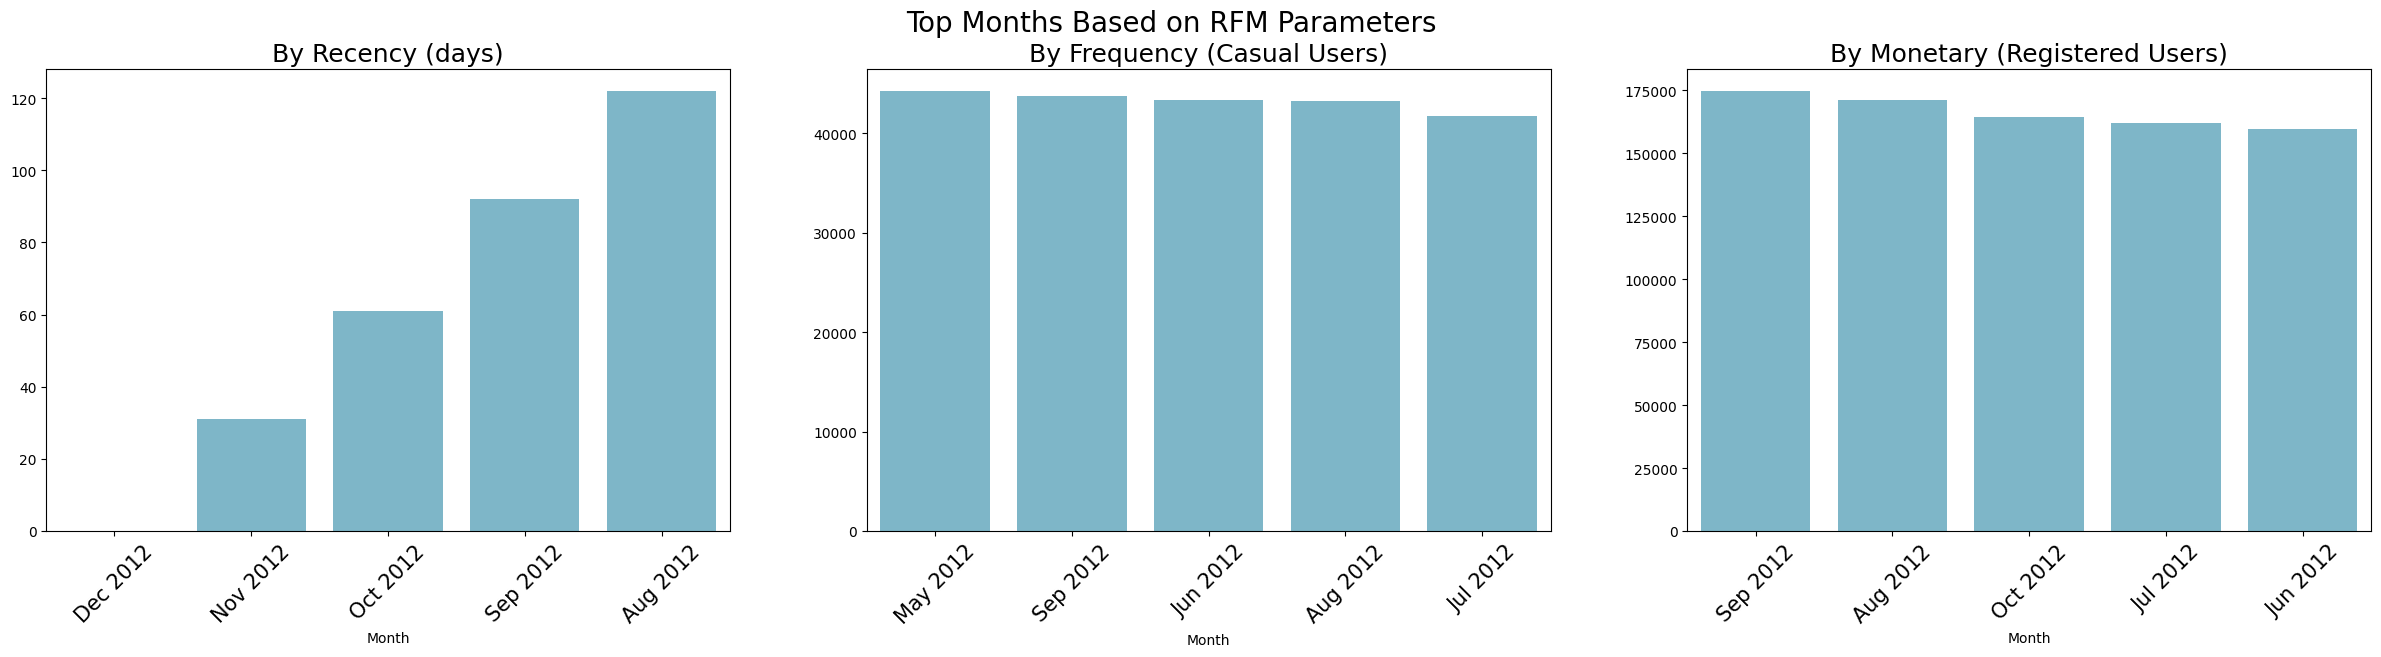

In [112]:
# Plot visualisasi untuk parameter RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

# Top 5 berdasarkan Recency
sns.barplot(y="Recency", x="Month", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Month")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

# Top 5 berdasarkan Frequency (pengguna kasual)
sns.barplot(y="Frequency_Casual", x="Month", data=rfm_df.sort_values(by="Frequency_Casual", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Month")
ax[1].set_title("By Frequency (Casual Users)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# Top 5 berdasarkan Monetary (pengguna terdaftar)
sns.barplot(y="Monetary_Registered", x="Month", data=rfm_df.sort_values(by="Monetary_Registered", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("Month")
ax[2].set_title("By Monetary (Registered Users)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Top Months Based on RFM Parameters", fontsize=20)
plt.show()

**Mengurutkan TMB berdasarkan recency, frequency, & monetary score**

In [116]:
rfm_df['r_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['Frequency_Casual'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['Monetary_Registered'].rank(ascending=True)

rfm_df.head()

,dteday,casual,registered,cnt,Recency,Frequency_Casual,Frequency_Registered,Monetary_Casual,Monetary_Registered,Month,r_rank,f_rank,m_rank
dteday,,,,,,,,,,,,,
2011-01,2011-01-31,3073,35116,38189,700,3073,35116,3073,35116,Jan 2011,1.0,1.0,1.0
2011-02,2011-02-28,6242,41973,48215,672,6242,41973,6242,41973,Feb 2011,2.0,2.0,2.0
2011-03,2011-03-31,12826,51219,64045,641,12826,51219,12826,51219,Mar 2011,3.0,6.0,3.0
2011-04,2011-04-30,22346,72524,94870,611,22346,72524,22346,72524,Apr 2011,4.0,10.0,4.0
2011-05,2011-05-31,31050,104771,135821,580,31050,104771,31050,104771,May 2011,5.0,15.0,11.0


In [117]:
# normalizing the rank of the TMB
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,dteday,casual,registered,cnt,Recency,Frequency_Casual,Frequency_Registered,Monetary_Casual,Monetary_Registered,Month,r_rank_norm,f_rank_norm,m_rank_norm
dteday,,,,,,,,,,,,,
2011-01,2011-01-31,3073,35116,38189,700,3073,35116,3073,35116,Jan 2011,4.166667,4.166667,4.166667
2011-02,2011-02-28,6242,41973,48215,672,6242,41973,6242,41973,Feb 2011,8.333333,8.333333,8.333333
2011-03,2011-03-31,12826,51219,64045,641,12826,51219,12826,51219,Mar 2011,12.500000,25.000000,12.500000
2011-04,2011-04-30,22346,72524,94870,611,22346,72524,22346,72524,Apr 2011,16.666667,41.666667,16.666667
2011-05,2011-05-31,31050,104771,135821,580,31050,104771,31050,104771,May 2011,20.833333,62.500000,45.833333


In [120]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['casual', 'RFM_score']].head(7)

,casual,RFM_score
dteday,,
2011-01,3073,0.21
2011-02,6242,0.42
2011-03,12826,0.80
2011-04,22346,1.18
2011-05,31050,2.34
2011-06,30612,2.79
2011-07,36452,2.69


**Segmentasi TMB berdasarkan RFM_score**

In [125]:
# Segment Top Months Based on the RFM score
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers",
    np.where(rfm_df['RFM_score'] > 4, "High value customers",
             np.where(rfm_df['RFM_score'] > 3, "Medium value customers",
                      np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))

In [126]:
# Buat format nama bulan yang lebih jelas
rfm_df['Month'] = rfm_df['dteday'].dt.strftime('%b %Y')

In [127]:
#  Tampilkan hasil segmentasi
segmentation_result = rfm_df[['Month', 'RFM_score', 'customer_segment']]
print(segmentation_result.head(20))

            Month  RFM_score        customer_segment
dteday                                              
2011-01  Jan 2011       0.21          Lost customers
2011-02  Feb 2011       0.42          Lost customers
2011-03  Mar 2011       0.80          Lost customers
2011-04  Apr 2011       1.18          Lost customers
2011-05  May 2011       2.34     Low value customers
2011-06  Jun 2011       2.79     Low value customers
2011-07  Jul 2011       2.69     Low value customers
2011-08  Aug 2011       2.55     Low value customers
2011-09  Sep 2011       2.17     Low value customers
2011-10  Oct 2011       2.02     Low value customers
2011-11  Nov 2011       1.52          Lost customers
2011-12  Dec 2011       1.14          Lost customers
2012-01  Jan 2012       1.53          Lost customers
2012-02  Feb 2012       1.62     Low value customers
2012-03  Mar 2012       3.42  Medium value customers
2012-04  Apr 2012       3.75  Medium value customers
2012-05  May 2012       4.19    High value cus

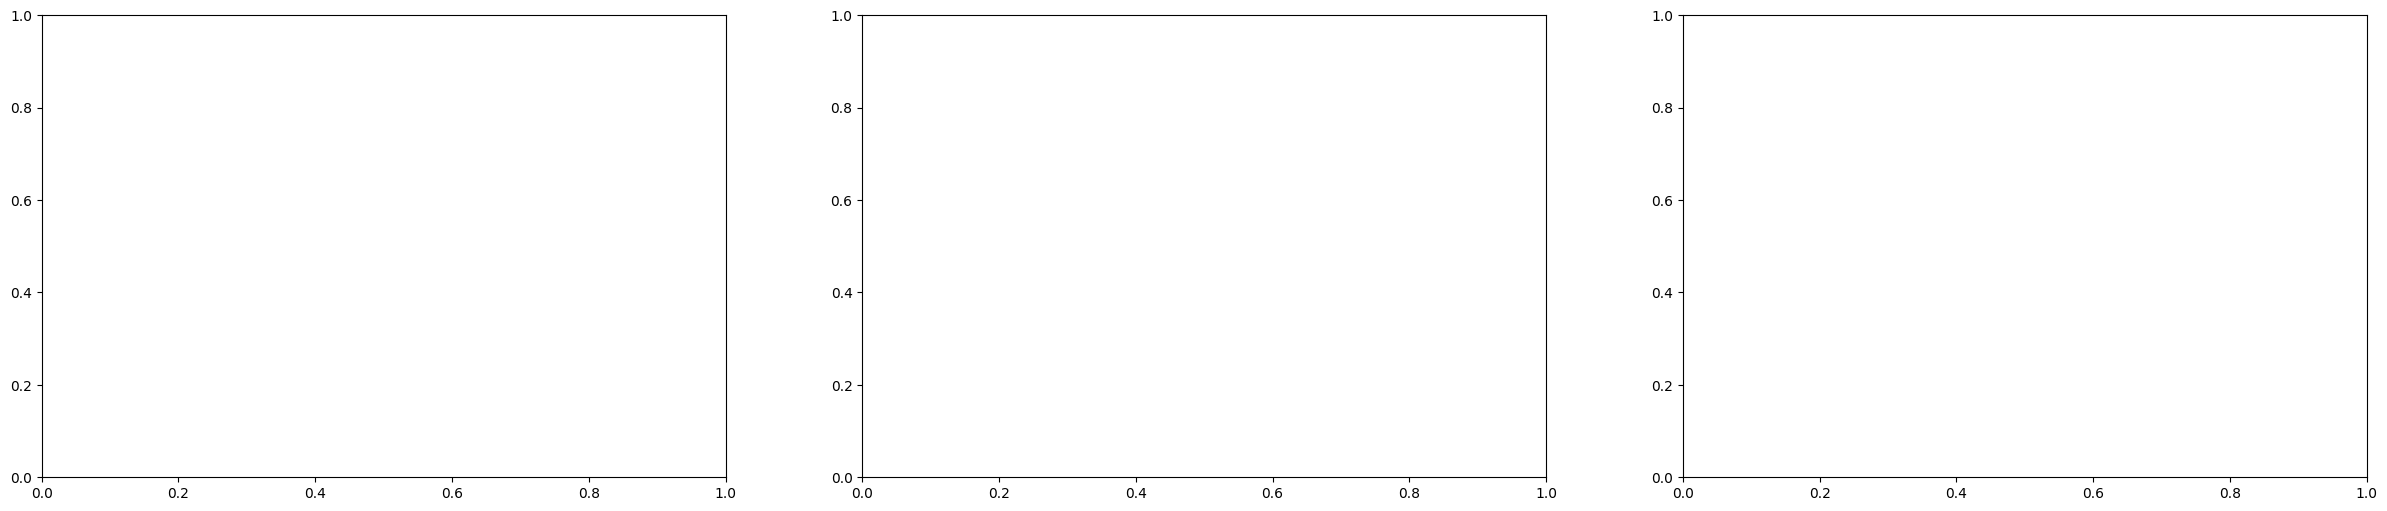

In [128]:
#  Plot visualisasi untuk parameter RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5